In [1]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
import pickle
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [31]:
# import dataset

path = '../Data/data_v2.csv'
dataset = pd.read_csv(path)
df = dataset.copy()

In [32]:
df = df.drop('id', axis=1)

In [6]:
df.head()

,area,sex,age,antiquity,salary,state,chapter,seniority
0,CUSTOMER SUCCESS,FEMENINO,27.0,9.0,4000000,active,EXPERIENCIA_USUARIO,ADVANCED
1,CUSTOMER SUCCESS,FEMENINO,43.0,57.0,33000000,active,HEAD,MASTER
2,CUSTOMER SUCCESS,MASCULINO,24.0,0.0,2050000,retired,BACKEND,TRAINEE
3,CUSTOMER SUCCESS,MASCULINO,25.0,21.0,5500000,active,BACKEND,ADVANCED
4,CUSTOMER SUCCESS,FEMENINO,31.0,93.0,3406000,active,CALIDAD DE SOFTWARE,ADVANCED


In [33]:
df  =df.drop(['area', 'chapter'], axis=1)
df.head()

,sex,age,antiquity,salary,state,seniority
0,FEMENINO,27.0,9.0,4000000,active,ADVANCED
1,FEMENINO,43.0,57.0,33000000,active,MASTER
2,MASCULINO,24.0,0.0,2050000,retired,TRAINEE
3,MASCULINO,25.0,21.0,5500000,active,ADVANCED
4,FEMENINO,31.0,93.0,3406000,active,ADVANCED


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1329 non-null   object 
 1   age        1329 non-null   float64
 2   antiquity  1329 non-null   float64
 3   salary     1329 non-null   int64  
 4   state      1329 non-null   object 
 5   seniority  1329 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 62.4+ KB


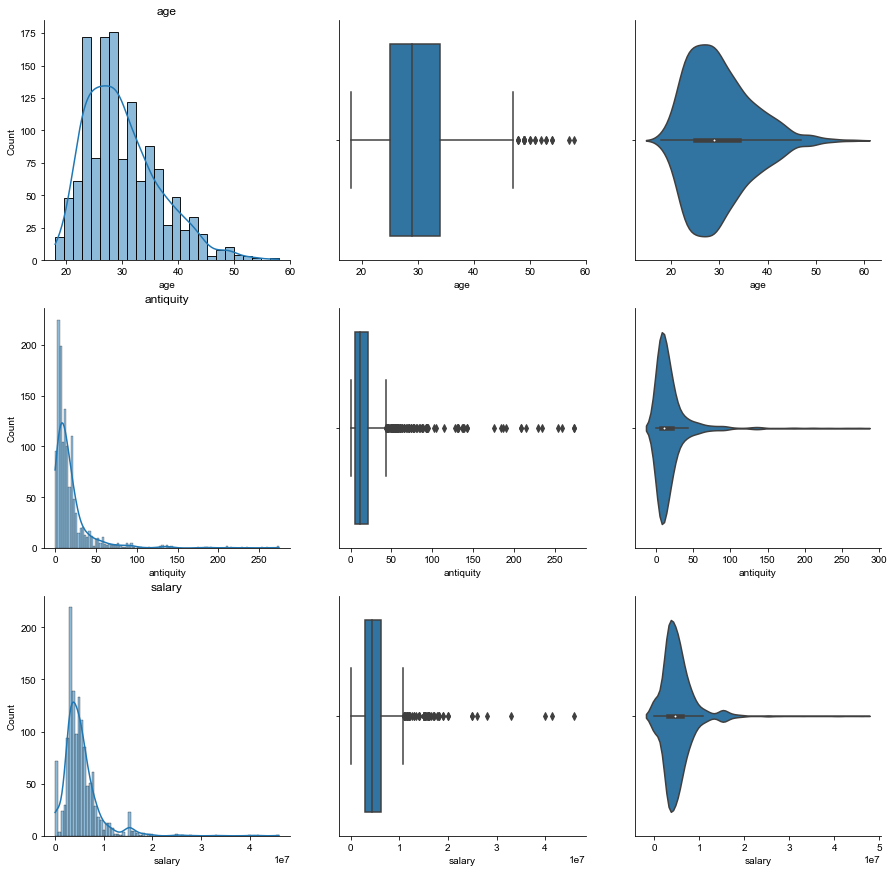

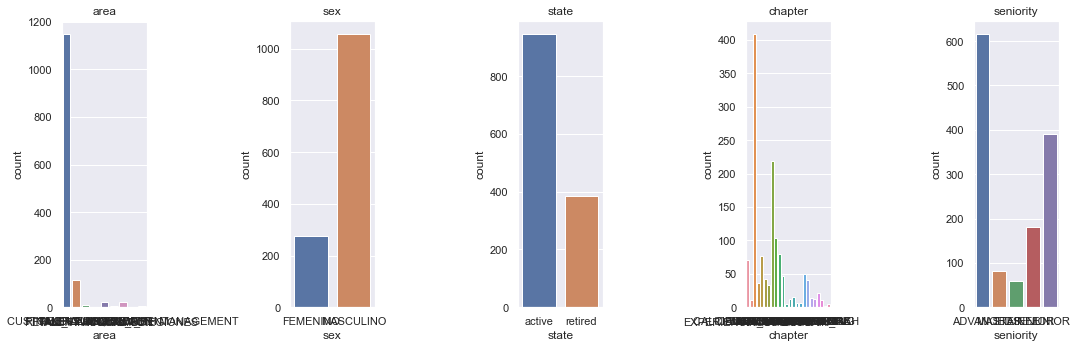

In [7]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

fig, axs = plt.subplots(ncols=3, nrows=len(num_cols), figsize=(15, len(num_cols)*5))

for i, col in enumerate(num_cols):
    sns.histplot(x=num_cols[i], data=df, kde=True, ax=axs[i][0])
    sns.boxplot(x=num_cols[i], data=df, ax=axs[i][1])
    sns.violinplot(x=num_cols[i], data=df, ax=axs[i][2])
    axs[i][0].set_title(num_cols[i])
    axs[i][1].set_title('')
    axs[i][2].set_title('')
    
sns.set_palette("Set2")
sns.set_style("whitegrid")
sns.despine()

sns.set(rc={'figure.figsize':(15, 5)})
fig, axs = plt.subplots(ncols=len(cat_cols), nrows=1)

for i, col in enumerate(cat_cols):
    sns.countplot(x=cat_cols[i], data=df, ax=axs[i])
    axs[i].set_title(cat_cols[i])

plt.tight_layout()
plt.show()

In [35]:
scaler = StandardScaler()

In [36]:
df[['age', 'antiquity', 'salary']] = scaler.fit_transform(df[['age', 'antiquity', 'salary']])

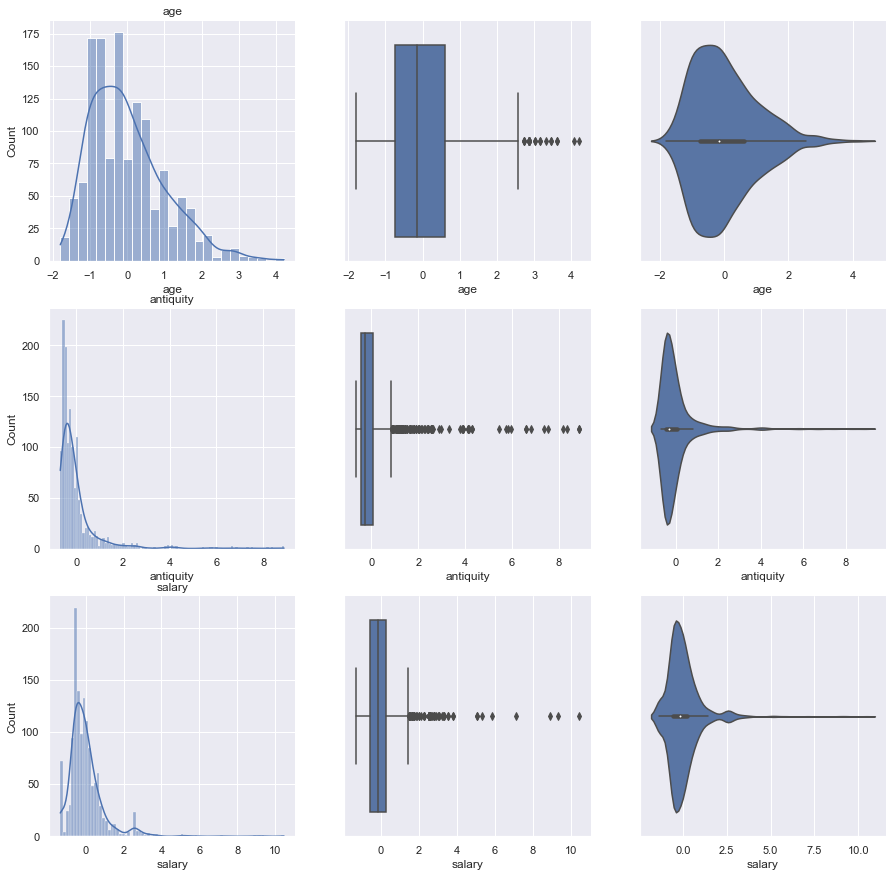

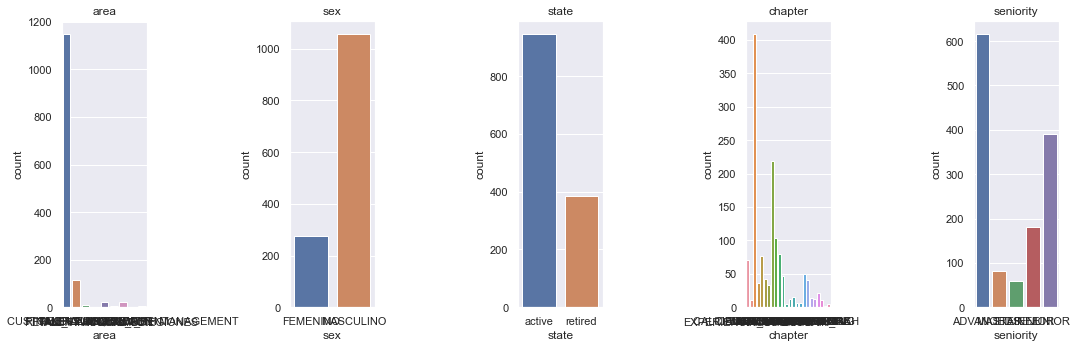

In [12]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

fig, axs = plt.subplots(ncols=3, nrows=len(num_cols), figsize=(15, len(num_cols)*5))

for i, col in enumerate(num_cols):
    sns.histplot(x=num_cols[i], data=df, kde=True, ax=axs[i][0])
    sns.boxplot(x=num_cols[i], data=df, ax=axs[i][1])
    sns.violinplot(x=num_cols[i], data=df, ax=axs[i][2])
    axs[i][0].set_title(num_cols[i])
    axs[i][1].set_title('')
    axs[i][2].set_title('')
    
sns.set_palette("Set2")
sns.set_style("whitegrid")
sns.despine()

sns.set(rc={'figure.figsize':(15, 5)})
fig, axs = plt.subplots(ncols=len(cat_cols), nrows=1)

for i, col in enumerate(cat_cols):
    sns.countplot(x=cat_cols[i], data=df, ax=axs[i])
    axs[i].set_title(cat_cols[i])

plt.tight_layout()
plt.show()

In [37]:
df

,sex,age,antiquity,salary,state,seniority
0,FEMENINO,-0.445111,-0.361086,-0.312392,active,ADVANCED
1,FEMENINO,1.962790,1.314875,7.131050,active,MASTER
2,MASCULINO,-0.896593,-0.675329,-0.812899,retired,TRAINEE
3,MASCULINO,-0.746099,0.057904,0.072614,active,ADVANCED
4,FEMENINO,0.156864,2.571846,-0.464854,active,ADVANCED
...,...,...,...,...,...,...
1324,MASCULINO,-1.197581,-0.605497,-0.438673,active,ADVANCED
1325,FEMENINO,-0.595605,1.279959,0.508954,active,SENIOR
1326,MASCULINO,2.715260,0.546726,-0.515675,active,ADVANCED
1327,MASCULINO,-0.595605,-0.570581,0.072614,active,ADVANCED


In [38]:
Y = df['state'].map({'active':0, 'retired':1})

In [39]:
X = df[['sex', 'age', 'antiquity', 'salary', 'seniority']]

In [40]:
X = pd.get_dummies(X, columns=['sex', 'seniority'], drop_first=True)

In [41]:
X

,age,antiquity,salary,sex_MASCULINO,seniority_JUNIOR,seniority_MASTER,seniority_SENIOR,seniority_TRAINEE
0,-0.445111,-0.361086,-0.312392,0,0,0,0,0
1,1.962790,1.314875,7.131050,0,0,1,0,0
2,-0.896593,-0.675329,-0.812899,1,0,0,0,1
3,-0.746099,0.057904,0.072614,1,0,0,0,0
4,0.156864,2.571846,-0.464854,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1324,-1.197581,-0.605497,-0.438673,1,0,0,0,0
1325,-0.595605,1.279959,0.508954,0,0,0,1,0
1326,2.715260,0.546726,-0.515675,1,0,0,0,0
1327,-0.595605,-0.570581,0.072614,1,0,0,0,0


Modelo

In [42]:
model = sm.Logit(Y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.558803
         Iterations 6


In [43]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:                 1329
Model:                          Logit   Df Residuals:                     1320
Method:                           MLE   Df Model:                            8
Date:                Sat, 29 Apr 2023   Pseudo R-squ.:                 0.07156
Time:                        16:32:27   Log-Likelihood:                -742.65
converged:                       True   LL-Null:                       -799.89
Covariance Type:            nonrobust   LLR p-value:                 4.548e-21
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2036      0.163     -7.364      0.000      -1.524      -0.883
age                   0.1356      0.075      1.809      0.071      -0.011       0.283
antiquity            -0.

Antes de entrar en la interpretación de los coeficientes, es importante resaltar que al usar la regresión logística, los coeficientes no representan un cambio unitario en la variable dependiente. En su lugar, representan el cambio en el logaritmo de las posibilidades (log-odds) de renunciar. Para obtener la interpretación en términos de porcentaje, debemos calcular la proporción de cambio en las posibilidades (odds ratio) utilizando la fórmula exp(coeficiente).

A continuación, se presenta la interpretación de cada coeficiente:

const: -1.2036 (P-valor: 0.000)
Este coeficiente representa el logaritmo de las posibilidades de renunciar cuando todas las variables independientes son iguales a cero (o en el caso de las variables categóricas, cuando se trata de la categoría de referencia). Dado que las variables han sido transformadas, no tiene una interpretación directa en este contexto.

edad: 0.1356 (P-valor: 0.071)
Por cada aumento en un año de edad, las posibilidades de renunciar aumentan en un exp(0.1356) = 1.145 (o un 14.5%) manteniendo constantes las demás variables. Sin embargo, el P-valor es mayor que 0.05, lo que sugiere que este efecto no es estadísticamente significativo al nivel del 5%.

antiguedad: -0.0957 (P-valor: 0.275)
Por cada aumento en un mes de antigüedad en la empresa, las posibilidades de renunciar disminuyen en un exp(-0.0957) = 0.908 (o un 9.2%) manteniendo constantes las demás variables. El P-valor es mayor que 0.05, lo que sugiere que este efecto no es estadísticamente significativo al nivel del 5%.

salario: -0.4279 (P-valor: 0.000)
Por cada aumento en una unidad estandarizada de salario, las posibilidades de renunciar disminuyen en un exp(-0.4279) = 0.652 (o un 34.8%) manteniendo constantes las demás variables. El P-valor es menor que 0.05, lo que indica que este efecto es estadísticamente significativo.

sexo_Masculino: 0.3791 (P-valor: 0.023)
Si la persona es de sexo masculino, las posibilidades de renunciar aumentan en un exp(0.3791) = 1.461 (o un 46.1%) en comparación con el sexo femenino (la categoría de referencia), manteniendo constantes las demás variables. El P-valor es menor que 0.05, lo que indica que este efecto es estadísticamente significativo.

seniority_Junior: -0.3106 (P-valor: 0.041)
Si la persona tiene una posición de seniority Junior, las posibilidades de renunciar disminuyen en un exp(-0.3106) = 0.733 (o un 26.7%) en comparación con la posición de Advanced (la categoría de referencia), manteniendo constantes las demás variables. El P-valor es menor que 0.05, lo que indica que este efecto es estadísticamente significativo.

seniority_Master: 2.2468 (P-valor: 0.000)
Si la persona tiene una posición de seniority Master, las posibilidades de renunciar aumentan en un exp(2.2468) = 9.457 (o un 845.7%) en comparación con la posición de Advanced (la categoría de referencia), manteniendo constantes las demás variables. El P-valor es menor que 0.05, lo que indica que este efecto es estadísticamente significativo.

seniority_Senior: -0.4142 (P-valor: 0.065)
Si la persona tiene una posición de seniority Senior, las posibilidades de renunciar disminuyen en un exp(-0.4142) = 0.661 (o un 33.9%) en comparación con la posición de Advanced (la categoría de referencia), manteniendo constantes las demás variables. El P-valor es mayor que 0.05, lo que sugiere que este efecto no es estadísticamente significativo al nivel del 5%.

# Seniority como variable categórica ordinal

In [44]:
df2 = pd.read_csv('../Data/data_v2.csv')
df2 = df2.drop(['id','area','chapter'], axis=1)

In [45]:
df2.head(3)

,sex,age,antiquity,salary,state,seniority
0,FEMENINO,27.0,9.0,4000000,active,ADVANCED
1,FEMENINO,43.0,57.0,33000000,active,MASTER
2,MASCULINO,24.0,0.0,2050000,retired,TRAINEE


In [46]:
df2 = pd.get_dummies(df2, columns=['sex'], drop_first=True)

In [20]:
df2.head(3)

,age,antiquity,salary,state,seniority,sex_MASCULINO
0,27.0,9.0,4000000,active,ADVANCED,0
1,43.0,57.0,33000000,active,MASTER,0
2,24.0,0.0,2050000,retired,TRAINEE,1


In [21]:
df2.seniority.value_counts()

ADVANCED    615
JUNIOR      390
SENIOR      182
MASTER       82
TRAINEE      60
Name: seniority, dtype: int64

In [47]:
# Crear un mapeo para la variable ordinal 'seniority

seniority_mapping = {
    'TRAINEE': 1,
    'JUNIOR' : 2,
    'ADVANCED' : 3,
    'SENIOR' : 4,
    'MASTER' : 5 
}

# Aplicar el mapeo a la columna "seniority"

df2['seniority'] = df2['seniority'].map(seniority_mapping)

In [25]:
df2.seniority.value_counts()

3    615
2    390
4    182
5     82
1     60
Name: seniority, dtype: int64

In [48]:
# Mapear la variable dependeinte
Y = df2['state'].map({'active':0, 'retired':1})

In [27]:
Y.value_counts()

0    944
1    385
Name: state, dtype: int64

In [29]:
df2.head(2)

,age,antiquity,salary,state,seniority,sex_MASCULINO
0,27.0,9.0,4000000,active,3,0
1,43.0,57.0,33000000,active,5,0


In [30]:
# Estandarizar las variables numéricas 'edad', 'salario' y 'antiguedad'
scaler = StandardScaler()
df2[['age', 'salary', 'antiquity']] = scaler.fit_transform(df2[['age', 'salary', 'antiquity']])


In [49]:
df2.head(3)

,age,antiquity,salary,state,seniority,sex_MASCULINO
0,27.0,9.0,4000000,active,3,0
1,43.0,57.0,33000000,active,5,0
2,24.0,0.0,2050000,retired,1,1


In [50]:
X = df2.drop('state', axis=1)

In [51]:
X = sm.add_constant(X)

In [52]:
model_2 = sm.Logit(Y, X).fit()
print(model_2.summary())

Optimization terminated successfully.
         Current function value: 0.578763
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:                 1329
Model:                          Logit   Df Residuals:                     1323
Method:                           MLE   Df Model:                            5
Date:                Sat, 29 Apr 2023   Pseudo R-squ.:                 0.03840
Time:                        16:35:41   Log-Likelihood:                -769.18
converged:                       True   LL-Null:                       -799.89
Covariance Type:            nonrobust   LLR p-value:                 6.144e-12
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.5685      0.361     -7.114      0.000      -3.276      -1.861
age               0.

In [58]:
# Calcular las medias de las variables independientes
X_mean = X.mean()

# Cambiar el valor de 'seniority' para cada nivel y calcular las posibilidades de renunciar
seniority_levels = [1, 2, 3, 4, 5]
for level in seniority_levels:
    X_mean['seniority'] = level
    logit = model_2.predict(X_mean.to_frame().T)  # Convertir la Serie en un DataFrame de una sola fila
    probability = logit.iloc[0]  # Extraer la probabilidad estimada de la Serie resultante
    print(f"Seniority level {level}: {probability:.4f}")


Seniority level 1: 0.1285
Seniority level 2: 0.1978
Seniority level 3: 0.2919
Seniority level 4: 0.4081
Seniority level 5: 0.5356


In [59]:
df2

,age,antiquity,salary,state,seniority,sex_MASCULINO
0,27.0,9.0,4000000,active,3,0
1,43.0,57.0,33000000,active,5,0
2,24.0,0.0,2050000,retired,1,1
3,25.0,21.0,5500000,active,3,1
4,31.0,93.0,3406000,active,3,0
...,...,...,...,...,...,...
1324,22.0,2.0,3508000,active,3,1
1325,26.0,56.0,7200000,active,4,0
1326,48.0,35.0,3208000,active,3,1
1327,26.0,3.0,5500000,active,3,1


In [62]:


# Crear la tabla dinámica
pivot_table = df2.pivot_table(index='seniority', columns='state', aggfunc='size', fill_value=0)




In [63]:
pivot_table

state,active,retired
seniority,,
1,50,10
2,286,104
3,433,182
4,150,32
5,25,57


In [71]:
import pandas as pd

# Crear la tabla de contingencia
contingency_table = pd.crosstab(index=df2['seniority'], columns=df2['state'])

# Cambiar los nombres de las columnas para evitar confusiones
contingency_table.columns = ['no_renuncia', 'renuncia']

# Calcular el total de personas por nivel de seniority
contingency_table['total'] = contingency_table['no_renuncia'] + contingency_table['renuncia']

# Calcular el porcentaje de renuncias por nivel de seniority
contingency_table['porcentaje_renuncias'] = (contingency_table['renuncia'] / contingency_table['total']) * 100

# Seleccionar las columnas de interés (número de renuncias y porcentaje de renuncias)
renuncias_por_seniority = contingency_table[['renuncia', 'porcentaje_renuncias']]

# Mostrar el resultado
print(renuncias_por_seniority)


           renuncia  porcentaje_renuncias
seniority                                
1                10             16.666667
2               104             26.666667
3               182             29.593496
4                32             17.582418
5                57             69.512195


In [61]:
X = X.drop(['antiquity'], axis=1)

In [62]:
model = sm.Logit(Y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.559275
         Iterations 6


In [63]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:                 1329
Model:                          Logit   Df Residuals:                     1321
Method:                           MLE   Df Model:                            7
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                 0.07078
Time:                        18:17:13   Log-Likelihood:                -743.28
converged:                       True   LL-Null:                       -799.89
Covariance Type:            nonrobust   LLR p-value:                 1.959e-21
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2075      0.164     -7.386      0.000      -1.528      -0.887
age                   0.1331      0.075      1.774      0.076      -0.014       0.280
salary               -0.

La interpretación de los coeficientes en una regresión logística se puede realizar a través del exponente de cada coeficiente, el cual representa el cambio multiplicativo en la probabilidad de la variable dependiente (en este caso, el estado de empleo) por cada unidad de cambio en la variable independiente correspondiente, manteniendo constantes todas las demás variables independientes.

La constante (-1.2075) representa el logaritmo de la proporción de chances (odds ratio) de que una persona renuncie a su trabajo cuando todas las variables independientes son iguales a cero. Esto significa que si todas las variables independientes fueran cero, la probabilidad de renunciar al trabajo sería exp(-1.2075) / (1 + exp(-1.2075)) = 0.23, lo que indica que el 23% de las personas renunciarían a su trabajo.

El coeficiente de la variable "edad" (0.1331) indica que por cada unidad de aumento en la edad de una persona, la probabilidad de que renuncie a su trabajo aumentará multiplicativamente en exp(0.1331) = 1.14 veces, manteniendo constantes todas las demás variables independientes.

El coeficiente de la variable "salario" (-0.4682) indica que por cada unidad de aumento en el salario de una persona, la probabilidad de que renuncie a su trabajo disminuirá multiplicativamente en exp(-0.4682) = 0.63 veces, manteniendo constantes todas las demás variables independientes.

El coeficiente de la variable "sexo_masculino" (0.3872) indica que si una persona es de género masculino (comparado con género femenino), la probabilidad de que renuncie a su trabajo aumentará multiplicativamente en exp(0.3872) = 1.47 veces, manteniendo constantes todas las demás variables independientes.

Los coeficientes de las variables categóricas "seniority" indican cómo cambia la probabilidad de que una persona renuncie a su trabajo en comparación con el nivel base (Trainee). En particular, el coeficiente de "seniority_Master" (2.2133) indica que si una persona tiene el nivel de seniority "Master" (comparado con "Trainee"), la probabilidad de que renuncie a su trabajo aumentará multiplicativamente en exp(2.2133) = 9.14 veces, manteniendo constantes todas las demás variables independientes. De manera similar, el coeficiente de "seniority_Junior" (-0.3025) indica que si una persona tiene el nivel de seniority "Junior" (comparado con "Trainee"), la probabilidad de que renuncie a su trabajo disminuirá multiplicativamente en exp(-0.3025) = 0.74 veces, manteniendo constantes todas las demás variables independientes. Y, finalmente, el coeficiente de "seniority_Senior" (-0.4343) indica que si una persona tiene el nivel de seniority "Senior" (comparado con "Trainee"), la probabilidad de que renuncie a su trabajo disminuirá multiplicativamente en exp(-0.4343) = 0.65 veces, manteniendo constantes todas las demás variables independientes.

# Pendiente

Pensar en como presentar los resultados a los tomadores de decisiones

# Calcular la probabilidad de permanencia o renuncia

In [7]:
import numpy as np

# Valores de los coeficientes
coeficientes = np.array([-1.2075, 0.1331, -0.4682, 0.3872, -0.3025, 2.2133, -0.4343, -0.9494])

# Media y desviación estándar de las variables numéricas
media_edad = 35.0
desv_edad = 5.0
media_salario = 50000.0
desv_salario = 10000.0

In [8]:
# Función para estandarizar las variables numéricas
def estandarizar_variables_numéricas(edad, salario):
    edad_estandarizada = (edad - media_edad) / desv_edad
    salario_estandarizado = (salario - media_salario) / desv_salario
    return edad_estandarizada, salario_estandarizado

In [9]:
# Función para calcular la probabilidad de que un empleado renuncie o permanezca en su trabajo
def calcular_probabilidad_renuncia(coeficientes, edad, salario, sexo_masculino, seniority_Junior, seniority_Master, seniority_Senior, seniority_Trainee):
    # Estandarizar variables numéricas
    edad_estandarizada, salario_estandarizado = estandarizar_variables_numéricas(edad, salario)
    # Crear vector de variables independientes
    variables_independientes = np.array([1, edad_estandarizada, salario_estandarizado, sexo_masculino, seniority_Junior, seniority_Master, seniority_Senior, seniority_Trainee])
    # Calcular la probabilidad de renuncia
    probabilidad_renuncia = 1 / (1 + np.exp(-np.dot(coeficientes, variables_independientes)))
    return probabilidad_renuncia

In [24]:
# Ejemplo de cálculo de probabilidad de renuncia
probabilidad_renuncia = calcular_probabilidad_renuncia(coeficientes, 22, 25000, 0, 0, 0, 1, 0)
print("Probabilidad de renuncia:", probabilidad_renuncia)

Probabilidad de renuncia: 0.3063243458016908


In [25]:
print("Probabilidad de permanencia:", 1-probabilidad_renuncia)

Probabilidad de permanencia: 0.6936756541983091


# Queda pendiente revisar como afentaría el cambio en Seniority de variables nominal a ordinal

Revisar los siguientes enlaces:

[Enlace 1](https://analyticsindiamag.com/a-complete-tutorial-on-ordinal-regression-in-python/)

[Enlace 2](https://towardsdatascience.com/implementing-and-interpreting-ordinal-logistic-regression-1ee699274cf5)

[Enlace 3](https://www.statsmodels.org/dev/generated/statsmodels.miscmodels.ordinal_model.OrderedModel.html)

[Enlace 4](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)
